In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import matplotlib.style as style
import matplotlib.gridspec as gridspec

In [2]:
data=pd.read_csv('data/train_titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


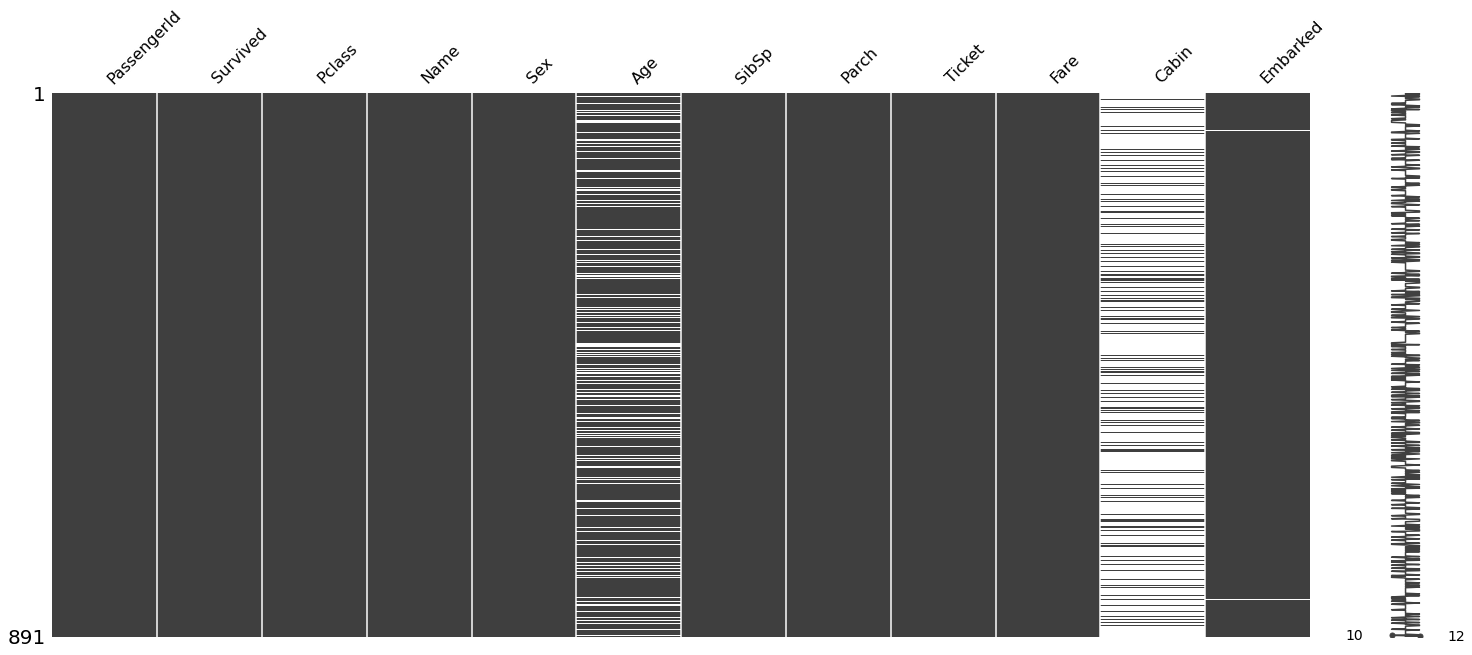

In [4]:
msno.matrix(data)

In [5]:
# Try to fix the Age and Cabin Missing Vals:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [6]:
def get_title(name):
    return name.split(',')[1].strip().split()[0].strip()

In [7]:
data['Title']=data['Name'].apply(lambda x:get_title(x))

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [9]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Don.           1
Lady.          1
Jonkheer.      1
Sir.           1
Mme.           1
the            1
Capt.          1
Ms.            1
Name: Title, dtype: int64

In [10]:
title_list=list(data['Title'].value_counts().index)

In [11]:
for title in title_list:
    age_impute=data.groupby('Title')['Age'].median()[title]
    data.loc[(data['Title']==title) & (data['Age'].isnull()),'Age']=age_impute

In [12]:
data.isnull().sum()[data.isnull().sum()!=0]

Cabin       687
Embarked      2
dtype: int64

In [13]:
#From the Data we observed that Cabin data might have only 2 cases either cabin or not cabin:
def fill_cabin(value):
    if value is None or value==np.nan:
        return 0
    else:
        return 1

In [14]:
data['Cabin']=data['Cabin'].apply(lambda x:fill_cabin(x))

In [15]:
data.isnull().sum()[data.isnull().sum()!=0]

Embarked    2
dtype: int64

In [16]:
#embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
#So we will take the mode
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [17]:
data.isnull().sum()[data.isnull().sum()!=0]

Series([], dtype: int64)

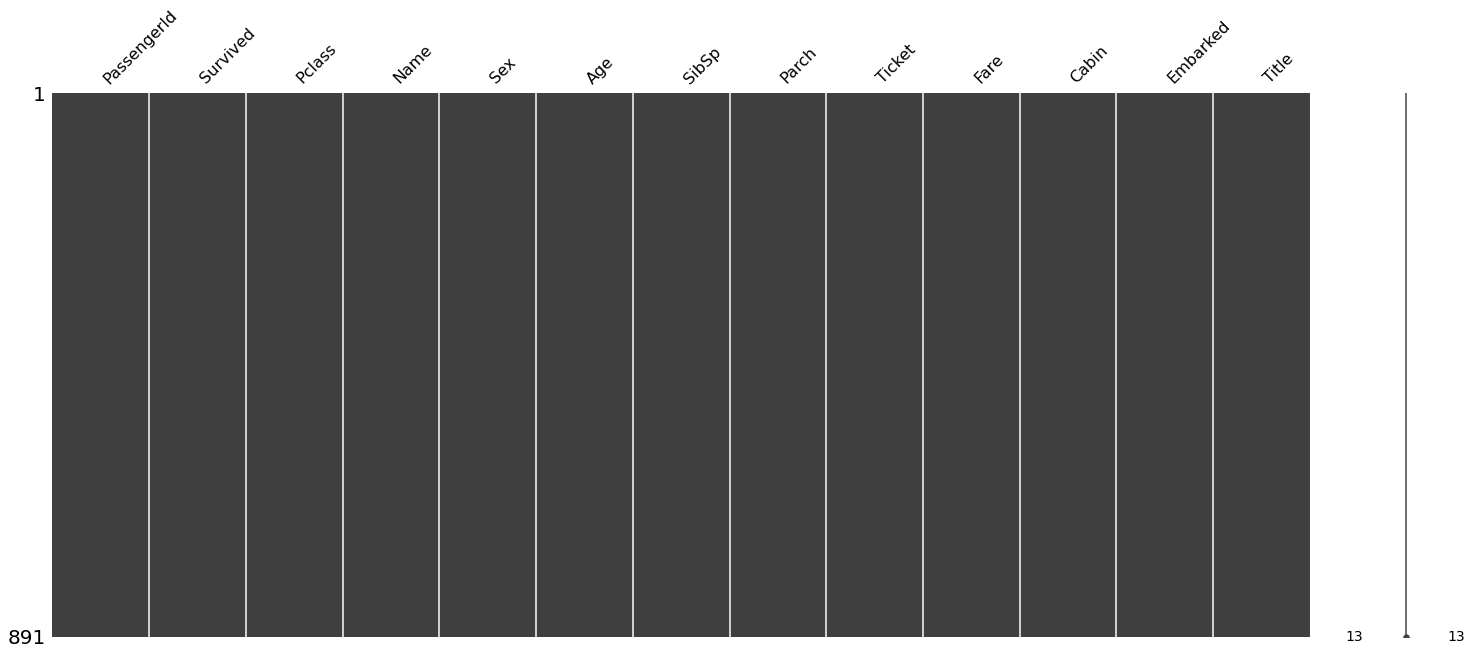

In [18]:
msno.matrix(data)

In [19]:
#No missing values --> So carry on with the feature relations:

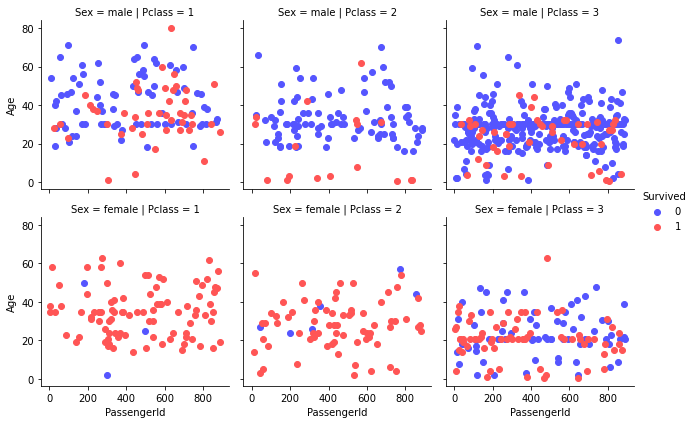

In [20]:
# Survival Age class Gender
grid = sns.FacetGrid(data, col = "Pclass", row = "Sex", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

In [21]:
# Majority of male died--> CLass 3 is criticcal

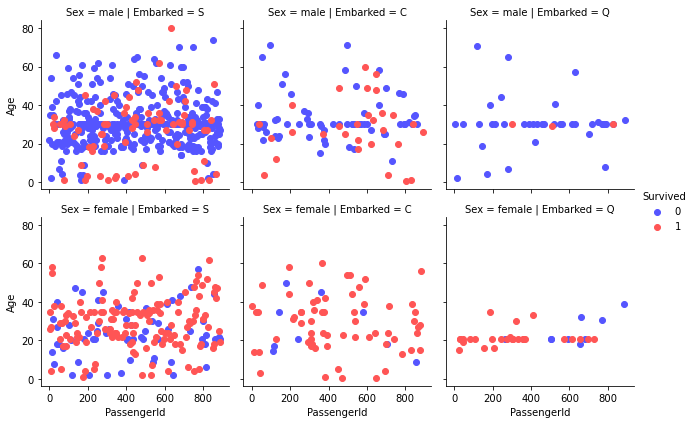

In [22]:
# Survival by Embarkement
grid = sns.FacetGrid(data, col = "Embarked", row = "Sex", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

In [23]:
# Majority of prople died who boarded from [S].

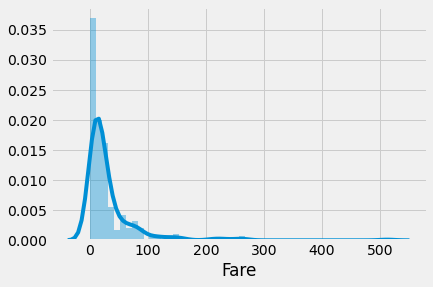

In [24]:
#Fare Data:
style.use('fivethirtyeight')
sns.distplot(data['Fare'])

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

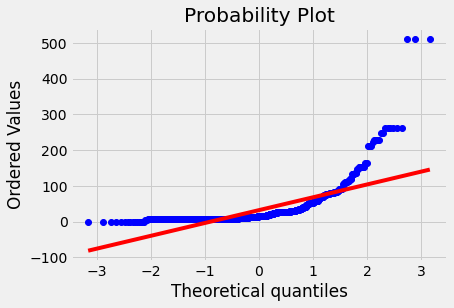

In [25]:
style.use('fivethirtyeight')
stats.probplot(data['Fare'],plot=plt)

In [26]:
#Many outliers are there:
data['Fare'].skew()

4.787316519674893

In [27]:
data['Fare'].kurt()

33.39814088089868

In [28]:
#Need to optimize it by using some technique:

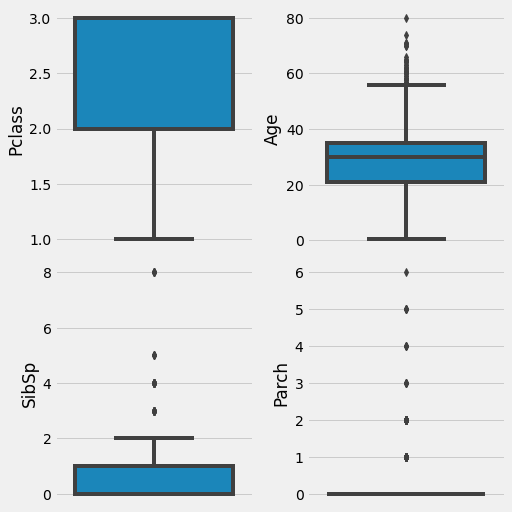

In [29]:
fig = plt.figure(constrained_layout=True, figsize=(7,7))
grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
sns.boxplot(data['Pclass'],ax=fig.add_subplot(grid[0,0]),orient='v')
sns.boxplot(data['Age'],ax=fig.add_subplot(grid[0,1]),orient='v')
sns.boxplot(data['SibSp'],ax=fig.add_subplot(grid[1,0]),orient='v')
sns.boxplot(data['Parch'],ax=fig.add_subplot(grid[1,1]),orient='v')

In [30]:
# Majority Age group is 20-40
data.dtypes[data.dtypes!='object'].index

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin'],
      dtype='object')

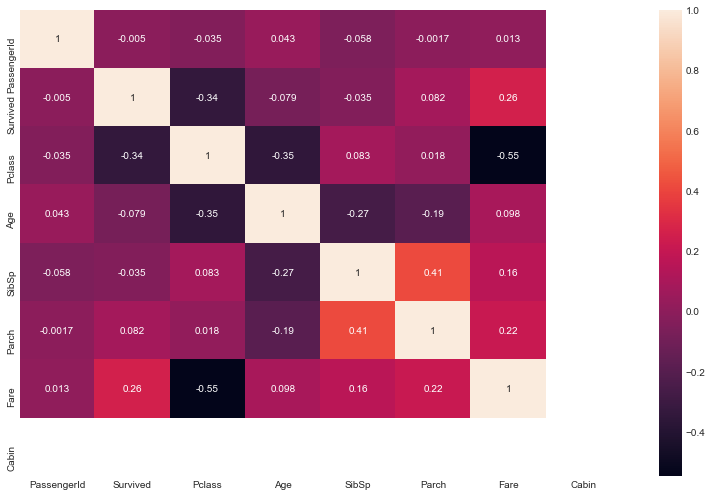

In [31]:
#Lets check the heatmap for numeric variable:
numeric=list(data.dtypes[data.dtypes!='object'].index)
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,8))
sns.heatmap(data[numeric].corr(),annot=True)

In [32]:
#Observed that SibSp and Parch have a good positive relation. Need to cross check to create new feature and remove them.

In [33]:
#Lets start encoding the categorical features:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [34]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [36]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [37]:
data=pd.get_dummies(data,columns=['Embarked','Pclass'])

In [38]:
data.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,Mr.,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,Mrs.,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,Miss.,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,Mrs.,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,Mr.,0,0,1,0,0,1


In [39]:
#Title , Name,Id, Ticket Not reuired so drop: Anyways from ticket we will get only those values which we already fetched.
data.drop(['Name','PassengerId','Title','Ticket'],axis=1,inplace=True)

In [40]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,1,1,0,0
4,0,1,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [41]:
#Lets work on the Fare:
#We will do the quantile capping to handle outliers:
test_data=data
print(data['Fare'].quantile(0.90))

77.9583


In [42]:
test_data['Fare'] = np.where(test_data['Fare'] >77, 77,test_data['Fare'])

In [43]:
test_data['Fare'].skew()

1.2669588073621458

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

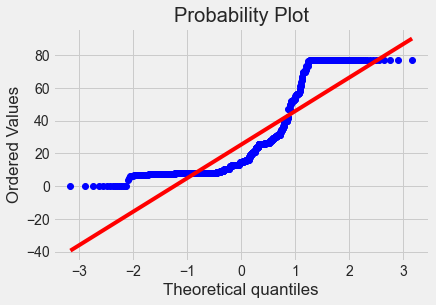

In [44]:
style.use('fivethirtyeight')
stats.probplot(test_data['Fare'],plot=plt)

In [47]:
#Somehow improved but need to get some other technique:
data['Fare'] = np.where(data['Fare'] >77, 77,data['Fare'])
# Try to scale Fare:
data['Fare']=(data['Fare']-min(data['Fare']))/(max(data['Fare']))-min(data['Fare'])

# Train Test Split:

In [48]:
y=data['Survived']
X=data.drop(['Survived'],axis=1)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
log_model=LogisticRegression()

In [52]:
log_model.fit(X_train,y_train)

c:\users\dell\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [53]:
log_model.score(X_train,y_train)

0.8061797752808989

In [54]:
log_model.score(X_test,y_test)

0.8044692737430168

In [55]:
preds=log_model.predict(X_test)

In [56]:
cm=confusion_matrix(y_test,preds)

In [57]:
cm

array([[90, 15],
       [20, 54]], dtype=int64)

In [58]:
# Try with other models:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
classifier.score(X_test,y_test)

0.8268156424581006

In [60]:
predict=classifier.predict(X_test)
cm_class=confusion_matrix(y_test,predict)

In [61]:
cm_class

array([[92, 13],
       [18, 56]], dtype=int64)

In [62]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters = [{'n_estimators': [10, 100, 500, 1000]}]

In [65]:
grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'accuracy',cv = 10,n_jobs = -1)

In [66]:
grid_search_model = grid_search.fit(X_train, y_train)

In [67]:
grid_search_model.best_score_

0.7949530516431926

In [68]:
grid_search_model.best_params_

{'n_estimators': 100}

In [70]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier()

In [71]:
xg_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
xg_classifier.score(X_test,y_test)

0.8100558659217877

In [73]:
xg_pred=xg_classifier.predict(X_test)
xg_cm=confusion_matrix(y_test,xg_pred)

In [74]:
xg_cm

array([[85, 20],
       [14, 60]], dtype=int64)

In [75]:
# Random Forest was the Best.as per confusion matrix.
# Still we can improve the model by adding a feature: combination of SibSp,Parch--> To avoid collinearity.
# Still need to improve the skewness of the Fare Feature.